# [Workshop] Abductive Reasoning using Bayes Method

# 0. Installation

In [1]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install pandas

# 1. Import Library

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# 2. Check Data

In [3]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')

# Print the first 5 rows of the dataframe.
ASD_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
# Replace special 
for symbol in ['-','/',' ']:
    ASD_data.columns = ASD_data.columns.str.replace(symbol,'_')
    
ASD_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits_
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# observing the shape of the data
ASD_data.shape

(1054, 19)

# 3. Data Preprocessing

## 3.1. Feature Selection

In [6]:
ASD_data = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score'], axis=1)

ASD_data.shape

(1054, 16)

## 3.2. Encoding

In [7]:
numeric_data = ASD_data.select_dtypes(include=['int64'])
numeric_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons
0,0,0,0,0,0,0,1,1,0,1,28
1,1,1,0,0,0,1,1,0,0,0,36
2,1,0,0,0,0,0,1,1,0,1,36
3,1,1,1,1,1,1,1,1,1,1,24
4,1,1,0,1,1,1,1,1,1,1,20


In [8]:
categorical_data = ASD_data.select_dtypes(include=['object'])
categorical_data.head()

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class_ASD_Traits_
0,f,middle eastern,yes,no,No
1,m,White European,yes,no,Yes
2,m,middle eastern,yes,no,Yes
3,m,Hispanic,no,no,Yes
4,f,White European,no,yes,Yes


In [9]:
l = []
for i in categorical_data.columns:
    data = pd.get_dummies(categorical_data[i]).iloc[:,:-1]
    data.columns = [i+"_"+j for j in data.columns]
    l.append(data)
l = pd.concat(l,axis=1)
l.head()

,Sex_f,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Jaundice_no,Family_mem_with_ASD_no,Class_ASD_Traits__No
0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [10]:
new_ASD_data = pd.concat([numeric_data,l],axis=1)
new_ASD_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Jaundice_no,Family_mem_with_ASD_no,Class_ASD_Traits__No
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,1
1,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0


In [11]:
new_ASD_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex_f', 'Ethnicity_Hispanic', 'Ethnicity_Latino',
       'Ethnicity_Native Indian', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Jaundice_no',
       'Family_mem_with_ASD_no', 'Class_ASD_Traits__No'],
      dtype='object')

In [12]:
len(new_ASD_data.columns)

25

In [13]:
total=0
for i in ASD_data.columns:
    if(ASD_data[i].dtype=='O'):
        total += ASD_data[i].nunique()-1
    else:
        total += 1
total

25

## 3.3. Choose Independent (X) and Dependent (Y) Features

In [14]:
X = new_ASD_data.iloc[:,:-1]
Y = new_ASD_data.iloc[:,-1]

# 4. Build Naive Bayes Model

## 4.1 Split the dataset into training set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1 / 5, random_state=1,stratify=Y)
print(X_train.shape)
print(X_test.shape)

(843, 24)
(211, 24)


In [16]:
print(y_train.shape)
print(y_test.shape)

(843,)
(211,)


## 4.2. Build Naive Bayes Model

In [17]:
NaiveBayesModel = MultinomialNB()
NaiveBayesModel.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(NaiveBayesModel.score(X_train, y_train)))
print('Score in test set: {:3f}'.format(NaiveBayesModel.score(X_test,y_test)))

Score in training set: 0.930
Score in test set: 0.924171


# 5. Visualize the performance

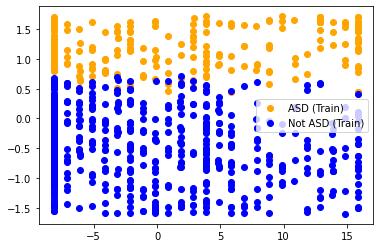

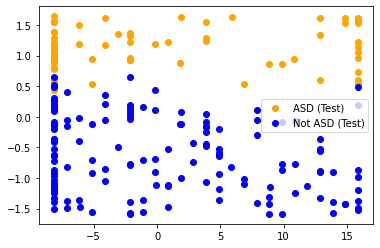

In [18]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(np.concatenate((X_train,X_test)))

# Train set
plt.scatter(X_new[:843, 0][y_train==1], X_new[:843, 1][y_train==1], marker='o', c='orange') # Orange: ASD_in_train; 
plt.scatter(X_new[:843, 0][y_train==0], X_new[:843, 1][y_train==0], marker='o', c='b') # Blue Not ASD_in_train;
plt.legend(['ASD (Train)', 'Not ASD (Train)'])
plt.show()

# Test set
plt.scatter(X_new[843:, 0][y_test==1], X_new[843:, 1][y_test==1], marker='o', c='orange') # Orange: ASD_in_test; 
plt.scatter(X_new[843:, 0][y_test==0], X_new[843:, 1][y_test==0], marker='o', c='b') # Blue Not ASD_in_test;
plt.legend(['ASD (Test)', 'Not ASD (Test)'])
plt.show()

In [19]:
xxx

NameError: name 'xxx' is not defined

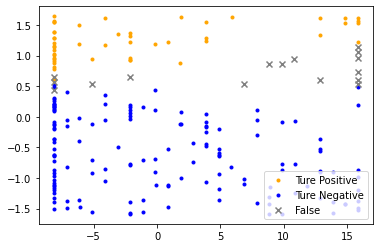

In [20]:
ASD_ASD = pd.Series(dtype = 'int')  # Ture Positive: y_test is ASD and recognized as ASD (Correct)
NOT_ASD_NOT_ASD = pd.Series(dtype = 'int') # Ture Negative: y_test is NOT ASD and recognized as NOT ASD (Correct)
wrong_answer = pd.Series(dtype = 'int') # False: y_test is ASD and recognized as NOT ASD  or y_test is NOT ASD and recognized as ASD (Wrong)

y_predict = NaiveBayesModel.predict(X_test)
for y_gt, y_pd in zip(list(y_test), y_predict):
    if y_gt == 1 and y_pd == 1:
        ASD_ASD=ASD_ASD.append(pd.Series(1))
        NOT_ASD_NOT_ASD=NOT_ASD_NOT_ASD.append(pd.Series(0))
        wrong_answer=wrong_answer.append(pd.Series(0))
    elif y_gt == 0 and y_pd == 0:
        ASD_ASD=ASD_ASD.append(pd.Series(0))
        NOT_ASD_NOT_ASD=NOT_ASD_NOT_ASD.append(pd.Series(1))
        wrong_answer=wrong_answer.append(pd.Series(0))
    else:
        ASD_ASD=ASD_ASD.append(pd.Series(0))
        NOT_ASD_NOT_ASD=NOT_ASD_NOT_ASD.append(pd.Series(0))
        wrong_answer=wrong_answer.append(pd.Series(1))
plt.scatter(X_new[843:, 0][ASD_ASD==1], X_new[843:, 1][ASD_ASD==1], 
            marker='.', c='orange') # Ture Positive: y_test is ASD and recognized as ASD (Correct)

plt.scatter(X_new[843:, 0][NOT_ASD_NOT_ASD==1], X_new[843:, 1][NOT_ASD_NOT_ASD==1], 
            marker='.', c='blue') # Ture Negative: y_test is NOT ASD and recognized as NOT ASD (Correct)

plt.scatter(X_new[843:, 0][wrong_answer==1], X_new[843:, 1][wrong_answer==1], 
            marker='x', c='grey') # False: y_test is ASD and recognized as NOT ASD  or y_test is NOT ASD and recognized as ASD (Wrong)


plt.legend(['Ture Positive', 'Ture Negative', 'False'],loc='lower right')
plt.show()

### Quiz: What you observe from the above figure? Where do wrong predicitons mostly like to occur?

In [ ]:
# Most of the points wrongly predicted by the model lie along the decision boundary.
# There isn't a clear decision boundary in Train set. 
# Positive and Negative points are overlapping in Train set. Model isn't able to train and distinguish well.